In [1]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv('C:\\Users\\Aspir\\Downloads\\iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['species'] = label.fit_transform(df['species'])

In [16]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [18]:
x = df.drop('species',axis = 1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y_ = df['species']
y_

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [20]:
from sklearn.preprocessing import OneHotEncoder
y1 = np.array(y_)
y2 = y1.reshape(-1, 1)
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y2)

C:\Users\Aspir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2)
print('Xtrain:',xtrain.shape)
print('Xtest:',xtest.shape)
print('Ytrain:',ytrain.shape)
print('Ytest:',ytest.shape)

Xtrain: (120, 4)
Xtest: (30, 4)
Ytrain: (120, 3)
Ytest: (30, 3)


In [24]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import Adam

In [80]:
model = Sequential()
model.add(Flatten(input_shape = (4,)))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(3,activation = 'softmax'))

In [81]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [82]:
import tensorflow as tf

In [83]:
tf_callbacks = tf.keras.callbacks.TensorBoard(log_dir = 'logs/fit',histogram_freq = 1)

In [84]:
history = model.fit(xtrain,ytrain,validation_data = (xtest,ytest),epochs = 50,callbacks = tf_callbacks)

Epoch 1/50
4/4 [==============================] - 2s 145ms/step - loss: 1.1434 - accuracy: 0.4000 - val_loss: 1.0892 - val_accuracy: 0.6000
Epoch 2/50
4/4 [==============================] - 0s 54ms/step - loss: 1.0880 - accuracy: 0.3750 - val_loss: 1.0515 - val_accuracy: 0.4333
Epoch 3/50
4/4 [==============================] - 0s 55ms/step - loss: 1.0517 - accuracy: 0.3667 - val_loss: 0.9559 - val_accuracy: 0.4333
Epoch 4/50
4/4 [==============================] - 0s 55ms/step - loss: 1.0183 - accuracy: 0.3250 - val_loss: 0.8778 - val_accuracy: 0.4333
Epoch 5/50
4/4 [==============================] - 0s 55ms/step - loss: 0.9654 - accuracy: 0.4000 - val_loss: 0.8483 - val_accuracy: 0.8333
Epoch 6/50
4/4 [==============================] - 0s 54ms/step - loss: 0.9142 - accuracy: 0.5417 - val_loss: 0.8058 - val_accuracy: 0.9000
Epoch 7/50
4/4 [==============================] - 0s 61ms/step - loss: 0.8815 - accuracy: 0.5917 - val_loss: 0.7546 - val_accuracy: 0.9667
Epoch 8/50
4/4 [==========

In [85]:
load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [86]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 10000), started 22:18:31 ago. (Use '!kill 10000' to kill it.)

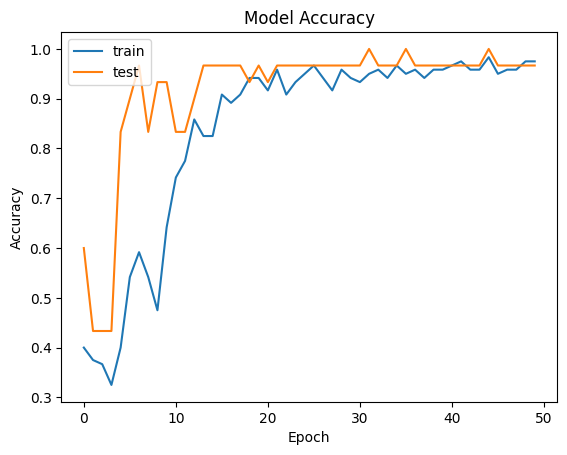

In [87]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

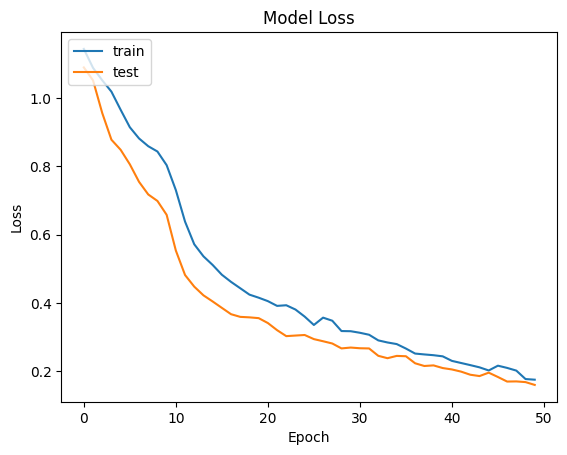

In [88]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()